In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [99]:
train_df = pd.read_csv('/content/hacktrain.csv')
test_df = pd.read_csv('/content/hacktest.csv')

In [100]:
train_df

,Unnamed: 0,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,1,water,637.5950,658.668,-1882.030,-1924.36,997.904,-1739.990,630.087,...,NaN,-1043.160,-1942.490,267.138,NaN,NaN,211.328,-2203.020,-1180.19,433.906
1,1,2,water,634.2400,593.705,-1625.790,-1672.32,914.198,-692.386,707.626,...,NaN,-933.934,-625.385,120.059,364.858,476.972,220.878,-2250.000,-1360.56,524.075
2,3,4,water,58.0174,-1599.160,NaN,-1052.63,NaN,-1564.630,NaN,...,-1025.880,368.622,NaN,-1227.800,304.621,NaN,369.214,-2202.120,NaN,-1343.550
3,4,5,water,72.5180,NaN,380.436,-1256.93,515.805,-1413.180,-802.942,...,-1813.950,155.624,NaN,-924.073,432.150,282.833,298.320,-2197.360,NaN,-826.727
4,7,8,water,1136.4400,NaN,NaN,1647.83,1935.800,NaN,2158.980,...,1535.000,1959.430,-279.317,-384.915,-113.406,1020.720,1660.650,-116.801,-568.05,-1357.140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,10537,10538,impervious,1207.7000,984.620,NaN,1166.25,937.478,1072.700,823.896,...,1117.740,1176.600,1044.110,NaN,369.082,465.843,362.882,979.795,NaN,433.659
7996,10538,10539,impervious,2170.3500,1419.720,1361.000,1478.71,983.911,1262.110,1422.860,...,984.634,2128.970,1379.660,NaN,762.633,485.204,446.724,771.747,1589.06,506.936
7997,10541,10542,impervious,1895.6800,1454.740,NaN,1033.56,1930.380,1057.150,1471.600,...,888.408,2093.020,1232.110,1190.830,1441.460,1170.880,1095.000,1818.650,2501.72,1247.770
7998,10542,10543,impervious,3465.7400,1283.320,413.412,4391.05,1146.820,4473.050,1614.750,...,5833.760,4047.320,4515.800,433.177,277.296,744.143,NaN,3759.710,NaN,388.346


In [101]:
train_df.describe()

,Unnamed: 0,ID,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
count,8000.000000,8000.000000,7440.000000,6800.000000,7200.000000,7040.000000,7520.000000,6880.000000,7280.000000,6640.000000,...,7520.000000,7280.000000,7120.000000,6240.000000,7360.000000,6880.000000,6560.000000,7440.000000,6800.000000,7600.000000
mean,4984.202625,4985.202625,5845.476916,4868.091395,4469.837748,5193.485086,2927.586705,4924.493648,3313.881373,4987.520158,...,4872.681670,3674.886731,3012.178524,3055.167358,2041.316792,2799.820342,2144.360224,6259.064275,2629.203972,2578.449870
std,2900.022898,2900.022898,2261.409128,2758.499942,2876.218394,2510.389832,2728.325670,2600.418802,2434.828743,2674.963286,...,2776.135418,2331.105635,2068.334108,2209.985887,2040.354512,2452.563243,2267.606759,1825.563702,2386.147667,2436.270797
min,0.000000,1.000000,-433.735000,-1781.790000,-2939.740000,-1924.360000,-1794.870000,-1848.910000,-1574.970000,-2532.490000,...,-2683.600000,-1043.160000,-2435.900000,-1505.780000,-1445.370000,55.564100,-232.292000,-2729.430000,-2139.860000,-4145.250000
25%,2514.750000,2515.750000,4331.232500,2067.265000,1521.195000,3087.072500,500.515750,2398.385000,992.778250,2404.075000,...,2010.732500,1369.355000,1368.742500,1009.827500,419.987000,791.741250,501.602750,5938.257500,691.171500,689.199000
50%,4917.500000,4918.500000,6908.255000,5513.375000,4672.000000,5810.755000,1586.240000,5742.485000,2802.010000,5831.120000,...,5484.905000,3659.770000,2633.695000,2624.125000,1183.715000,1599.385000,969.711500,6941.010000,1521.210000,1439.950000
75%,7311.250000,7312.250000,7626.845000,7555.570000,7431.697500,7511.880000,5703.067500,7280.110000,5508.350000,7430.915000,...,7607.755000,5927.035000,4128.082500,4952.317500,3075.997500,4909.997500,3227.380000,7395.612500,4452.257500,4146.342500
max,10544.000000,10545.000000,8376.150000,8566.420000,8650.500000,8516.100000,8267.120000,8499.330000,8001.700000,8452.380000,...,8489.970000,7981.820000,8445.410000,7762.980000,8078.080000,8216.700000,8247.630000,8410.330000,8418.230000,8502.020000


In [102]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8000 non-null   int64  
 1   ID          8000 non-null   int64  
 2   class       8000 non-null   object 
 3   20150720_N  7440 non-null   float64
 4   20150602_N  6800 non-null   float64
 5   20150517_N  7200 non-null   float64
 6   20150501_N  7040 non-null   float64
 7   20150415_N  7520 non-null   float64
 8   20150330_N  6880 non-null   float64
 9   20150314_N  7280 non-null   float64
 10  20150226_N  6640 non-null   float64
 11  20150210_N  7360 non-null   float64
 12  20150125_N  6960 non-null   float64
 13  20150109_N  7120 non-null   float64
 14  20141117_N  6720 non-null   float64
 15  20141101_N  7600 non-null   float64
 16  20141016_N  6560 non-null   float64
 17  20140930_N  7200 non-null   float64
 18  20140813_N  7440 non-null   float64
 19  20140626_N  6400 non-null  

In [103]:
train_df.columns

Index(['Unnamed: 0', 'ID', 'class', '20150720_N', '20150602_N', '20150517_N',
       '20150501_N', '20150415_N', '20150330_N', '20150314_N', '20150226_N',
       '20150210_N', '20150125_N', '20150109_N', '20141117_N', '20141101_N',
       '20141016_N', '20140930_N', '20140813_N', '20140626_N', '20140610_N',
       '20140525_N', '20140509_N', '20140423_N', '20140407_N', '20140322_N',
       '20140218_N', '20140202_N', '20140117_N', '20140101_N'],
      dtype='object')

In [104]:
test_df.isnull().sum()

,0
Unnamed: 0,0
ID,0
20150720_N,0
20150602_N,0
20150517_N,0
20150501_N,0
20150415_N,0
20150330_N,0
20150314_N,0
20150226_N,0


In [105]:
test_df.columns

Index(['Unnamed: 0', 'ID', '20150720_N', '20150602_N', '20150517_N',
       '20150501_N', '20150415_N', '20150330_N', '20150314_N', '20150226_N',
       '20150210_N', '20150125_N', '20150109_N', '20141117_N', '20141101_N',
       '20141016_N', '20140930_N', '20140813_N', '20140626_N', '20140610_N',
       '20140525_N', '20140509_N', '20140423_N', '20140407_N', '20140322_N',
       '20140218_N', '20140202_N', '20140117_N', '20140101_N'],
      dtype='object')

In [106]:
# prompt: show the value counts for nan values in each column

train_df.isnull().sum()

,0
Unnamed: 0,0
ID,0
class,0
20150720_N,560
20150602_N,1200
20150517_N,800
20150501_N,960
20150415_N,480
20150330_N,1120
20150314_N,720


In [107]:
# example DataFrame
# df = pd.read_csv("your_data.csv")

# 1) Identify your numeric columns (you probably want to skip ID, index or any non-numeric)
numeric_cols = train_df.select_dtypes(include=[np.number]).columns.drop('ID', errors='ignore')

# 2) For each class, fill NaNs in those numeric columns with the group-mean for that column
train_df[numeric_cols] = (
    train_df
    .groupby('class')[numeric_cols]
    .transform(lambda col: col.fillna(col.mean()))
)

# Now df has no NaNs in your numeric columns; they’ve been replaced by the class-specific mean.

In [108]:
# # Function to fill NaN values in columns ending with _N with the row mean
# def fill_n_nans_with_row_mean(df):
#   for col in df.columns:
#     if col.endswith('_N'):
#       n_columns = [c for c in df.columns if c.endswith('_N')]
#       df[col] = df.apply(lambda row: row[col] if pd.notna(row[col]) else row[n_columns].mean(), axis=1)
#   return df

# # Apply the function to the training and testing dataframes
# train_df = fill_n_nans_with_row_mean(train_df.copy())

# # Verify if NaNs are filled in the specified columns
# print("NaN count after filling for training data:")
# print(train_df.isnull().sum())


In [109]:
train_df

,Unnamed: 0,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,1,water,637.5950,658.668000,-1882.030000,-1924.360000,997.904000,-1739.990000,630.087000,...,2013.680657,-1043.160,-1942.490000,267.138000,1127.101172,987.976689,211.328000,-2203.020,-1180.190000,433.906
1,1,2,water,634.2400,593.705000,-1625.790000,-1672.320000,914.198000,-692.386000,707.626000,...,2013.680657,-933.934,-625.385000,120.059000,364.858000,476.972000,220.878000,-2250.000,-1360.560000,524.075
2,3,4,water,58.0174,-1599.160000,1101.121938,-1052.630000,1037.900596,-1564.630000,1131.306331,...,-1025.880000,368.622,1217.060015,-1227.800000,304.621000,987.976689,369.214000,-2202.120,973.156134,-1343.550
3,4,5,water,72.5180,1628.972375,380.436000,-1256.930000,515.805000,-1413.180000,-802.942000,...,-1813.950000,155.624,1217.060015,-924.073000,432.150000,282.833000,298.320000,-2197.360,973.156134,-826.727
4,7,8,water,1136.4400,1628.972375,1101.121938,1647.830000,1935.800000,931.040746,2158.980000,...,1535.000000,1959.430,-279.317000,-384.915000,-113.406000,1020.720000,1660.650000,-116.801,-568.050000,-1357.140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,10537,10538,impervious,1207.7000,984.620000,1703.133611,1166.250000,937.478000,1072.700000,823.896000,...,1117.740000,1176.600,1044.110000,1461.677426,369.082000,465.843000,362.882000,979.795,1685.555382,433.659
7996,10538,10539,impervious,2170.3500,1419.720000,1361.000000,1478.710000,983.911000,1262.110000,1422.860000,...,984.634000,2128.970,1379.660000,1461.677426,762.633000,485.204000,446.724000,771.747,1589.060000,506.936
7997,10541,10542,impervious,1895.6800,1454.740000,1703.133611,1033.560000,1930.380000,1057.150000,1471.600000,...,888.408000,2093.020,1232.110000,1190.830000,1441.460000,1170.880000,1095.000000,1818.650,2501.720000,1247.770
7998,10542,10543,impervious,3465.7400,1283.320000,413.412000,4391.050000,1146.820000,4473.050000,1614.750000,...,5833.760000,4047.320,4515.800000,433.177000,277.296000,744.143000,876.051986,3759.710,1685.555382,388.346


In [110]:
train_df.describe()

,Unnamed: 0,ID,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,4984.202625,4985.202625,5846.717925,4858.127458,4462.807655,5189.797184,2928.271370,4927.317991,3313.153775,4983.498894,...,4877.233330,3679.855554,3008.928375,3053.373893,2040.632013,2800.987081,2143.702292,6252.885790,2624.145368,2579.562461
std,2900.022898,2900.022898,2199.793921,2576.151532,2752.969357,2389.991871,2648.512246,2437.757761,2330.138872,2480.575024,...,2699.859384,2228.616889,1956.841727,1972.931289,1959.040190,2290.253950,2068.621093,1801.624928,2211.507696,2376.609617
min,0.000000,1.000000,-433.735000,-1781.790000,-2939.740000,-1924.360000,-1794.870000,-1848.910000,-1574.970000,-2532.490000,...,-2683.600000,-1043.160000,-2435.900000,-1505.780000,-1445.370000,55.564100,-232.292000,-2729.430000,-2139.860000,-4145.250000
25%,2514.750000,2515.750000,4590.090000,2366.027500,1703.133611,3308.595000,532.103250,2791.292500,1091.465000,2858.362500,...,2153.717500,1533.392500,1534.675000,1241.200000,446.283000,889.501250,575.229250,5937.047500,781.651750,712.165250
50%,4917.500000,4918.500000,6715.280000,5298.687946,4992.698499,5727.660693,1838.475000,5254.827392,3255.070000,5400.247251,...,5352.051984,3892.083492,2884.705000,3164.814156,1369.585000,2040.181438,1217.760000,6870.548767,1878.800000,1572.880000
75%,7311.250000,7312.250000,7593.770000,7331.677500,7212.610000,7364.137500,5457.340000,7101.790000,5268.065000,7243.962500,...,7559.105000,5720.952500,3912.410764,4285.712500,2837.752500,4067.285000,2458.607325,7365.035000,3752.205000,3907.092500
max,10544.000000,10545.000000,8376.150000,8566.420000,8650.500000,8516.100000,8267.120000,8499.330000,8001.700000,8452.380000,...,8489.970000,7981.820000,8445.410000,7762.980000,8078.080000,8216.700000,8247.630000,8410.330000,8418.230000,8502.020000


In [111]:
train_df.isnull().sum()

,0
Unnamed: 0,0
ID,0
class,0
20150720_N,0
20150602_N,0
20150517_N,0
20150501_N,0
20150415_N,0
20150330_N,0
20150314_N,0


In [112]:
ndvi_cols = [col for col in train_df.columns if col.endswith('_N')]

train_df['ndvi_mean'] = train_df[ndvi_cols].mean(axis=1)
train_df['ndvi_std'] = train_df[ndvi_cols].std(axis=1)
train_df['ndvi_min'] = train_df[ndvi_cols].min(axis=1)
train_df['ndvi_max'] = train_df[ndvi_cols].max(axis=1)
train_df['ndvi_range'] = train_df['ndvi_max'] - train_df['ndvi_min']
train_df['ndvi_median'] = train_df[ndvi_cols].median(axis=1)


In [113]:
from statsmodels.nonparametric.smoothers_lowess import lowess
import pandas as pd

def smooth_n_columns_and_merge(df, frac=0.1):
    df_smoothed = df.copy()
    n_columns = [col for col in df.columns if col.endswith('_N')]

    for col in n_columns:
        non_null_data = df[col].dropna()
        if len(non_null_data) > 1:
            x_values = non_null_data.index.values
            y_values = non_null_data.values
            smoothed_data = lowess(y_values, x_values, frac=frac, return_sorted=False)
            smoothed_series = pd.Series(smoothed_data, index=non_null_data.index)
            df_smoothed[col + '_smoothed'] = df[col].combine_first(smoothed_series)
        else:
            # If not enough data to smooth, just copy the original
            df_smoothed[col + '_smoothed'] = df[col]

    return df_smoothed

# Apply the function to train_df
train_df_smoothed = smooth_n_columns_and_merge(train_df.copy(), frac=0.1)

# View the result
print("Shape before:", train_df.shape)
print("Shape after adding smoothed columns:", train_df_smoothed.shape)
train_df_smoothed.head()


Shape before: (8000, 36)
Shape after adding smoothed columns: (8000, 63)


,Unnamed: 0,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,...,20140610_N_smoothed,20140525_N_smoothed,20140509_N_smoothed,20140423_N_smoothed,20140407_N_smoothed,20140322_N_smoothed,20140218_N_smoothed,20140202_N_smoothed,20140117_N_smoothed,20140101_N_smoothed
0,0,1,water,637.5950,658.668000,-1882.030000,-1924.36,997.904000,-1739.990000,630.087000,...,2013.680657,-1043.160,-1942.490000,267.138,1127.101172,987.976689,211.328,-2203.020,-1180.190000,433.906
1,1,2,water,634.2400,593.705000,-1625.790000,-1672.32,914.198000,-692.386000,707.626000,...,2013.680657,-933.934,-625.385000,120.059,364.858000,476.972000,220.878,-2250.000,-1360.560000,524.075
2,3,4,water,58.0174,-1599.160000,1101.121938,-1052.63,1037.900596,-1564.630000,1131.306331,...,-1025.880000,368.622,1217.060015,-1227.800,304.621000,987.976689,369.214,-2202.120,973.156134,-1343.550
3,4,5,water,72.5180,1628.972375,380.436000,-1256.93,515.805000,-1413.180000,-802.942000,...,-1813.950000,155.624,1217.060015,-924.073,432.150000,282.833000,298.320,-2197.360,973.156134,-826.727
4,7,8,water,1136.4400,1628.972375,1101.121938,1647.83,1935.800000,931.040746,2158.980000,...,1535.000000,1959.430,-279.317000,-384.915,-113.406000,1020.720000,1660.650,-116.801,-568.050000,-1357.140


In [114]:
ndvi_cols = [col for col in train_df_smoothed.columns if col.endswith('_N_smoothed')]

train_df_smoothed['ndvi_mean_s'] = train_df_smoothed[ndvi_cols].mean(axis=1)
train_df_smoothed['ndvi_std_s'] = train_df_smoothed[ndvi_cols].std(axis=1)
train_df_smoothed['ndvi_min_s'] = train_df_smoothed[ndvi_cols].min(axis=1)
train_df_smoothed['ndvi_max_s'] = train_df_smoothed[ndvi_cols].max(axis=1)
train_df_smoothed['ndvi_range_s'] = train_df_smoothed['ndvi_max_s'] - train_df_smoothed['ndvi_min_s']
train_df_smoothed['ndvi_median_s'] = train_df_smoothed[ndvi_cols].median(axis=1)


In [115]:
train_df_smoothed

,Unnamed: 0,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,...,20140218_N_smoothed,20140202_N_smoothed,20140117_N_smoothed,20140101_N_smoothed,ndvi_mean_s,ndvi_std_s,ndvi_min_s,ndvi_max_s,ndvi_range_s,ndvi_median_s
0,0,1,water,637.5950,658.668000,-1882.030000,-1924.360000,997.904000,-1739.990000,630.087000,...,211.328000,-2203.020,-1180.190000,433.906,-83.199985,1168.290047,-2203.020000,2013.680657,4216.700657,433.906000
1,1,2,water,634.2400,593.705000,-1625.790000,-1672.320000,914.198000,-692.386000,707.626000,...,220.878000,-2250.000,-1360.560000,524.075,-168.687157,1031.967974,-2250.000000,2013.680657,4263.680657,214.200000
2,3,4,water,58.0174,-1599.160000,1101.121938,-1052.630000,1037.900596,-1564.630000,1131.306331,...,369.214000,-2202.120,973.156134,-1343.550,11.609854,1294.020013,-3162.140000,2505.037316,5667.177316,369.214000
3,4,5,water,72.5180,1628.972375,380.436000,-1256.930000,515.805000,-1413.180000,-802.942000,...,298.320000,-2197.360,973.156134,-826.727,-116.589388,1113.909115,-2829.400000,1628.972375,4458.372375,298.320000
4,7,8,water,1136.4400,1628.972375,1101.121938,1647.830000,1935.800000,931.040746,2158.980000,...,1660.650000,-116.801,-568.050000,-1357.140,747.709522,1230.552225,-2646.050000,2505.037316,5151.087316,1101.121938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,10537,10538,impervious,1207.7000,984.620000,1703.133611,1166.250000,937.478000,1072.700000,823.896000,...,362.882000,979.795,1685.555382,433.659,1059.310961,440.817977,362.882000,2248.894448,1886.012448,1044.110000
7996,10538,10539,impervious,2170.3500,1419.720000,1361.000000,1478.710000,983.911000,1262.110000,1422.860000,...,446.724000,771.747,1589.060000,506.936,1256.870979,548.536802,336.289000,2178.670000,1842.381000,1372.680000
7997,10541,10542,impervious,1895.6800,1454.740000,1703.133611,1033.560000,1930.380000,1057.150000,1471.600000,...,1095.000000,1818.650,2501.720000,1247.770,1591.713436,607.530734,447.868000,2780.930000,2333.062000,1471.600000
7998,10542,10543,impervious,3465.7400,1283.320000,413.412000,4391.050000,1146.820000,4473.050000,1614.750000,...,876.051986,3759.710,1685.555382,388.346,2219.456429,1613.433712,244.594000,5833.760000,5589.166000,1685.555382


In [116]:
train_df_smoothed.columns

Index(['Unnamed: 0', 'ID', 'class', '20150720_N', '20150602_N', '20150517_N',
       '20150501_N', '20150415_N', '20150330_N', '20150314_N', '20150226_N',
       '20150210_N', '20150125_N', '20150109_N', '20141117_N', '20141101_N',
       '20141016_N', '20140930_N', '20140813_N', '20140626_N', '20140610_N',
       '20140525_N', '20140509_N', '20140423_N', '20140407_N', '20140322_N',
       '20140218_N', '20140202_N', '20140117_N', '20140101_N', 'ndvi_mean',
       'ndvi_std', 'ndvi_min', 'ndvi_max', 'ndvi_range', 'ndvi_median',
       '20150720_N_smoothed', '20150602_N_smoothed', '20150517_N_smoothed',
       '20150501_N_smoothed', '20150415_N_smoothed', '20150330_N_smoothed',
       '20150314_N_smoothed', '20150226_N_smoothed', '20150210_N_smoothed',
       '20150125_N_smoothed', '20150109_N_smoothed', '20141117_N_smoothed',
       '20141101_N_smoothed', '20141016_N_smoothed', '20140930_N_smoothed',
       '20140813_N_smoothed', '20140626_N_smoothed', '20140610_N_smoothed',
       '20

PCA applied. Resulting DataFrame with principal components:
   principal_component_1  principal_component_2
0             -15.398787              -5.674596
1             -15.883129              -5.469631
2             -15.294866              -5.048645
3             -16.068178              -5.663471
4             -12.865277              -4.295789

Explained variance ratio by each principal component:
[0.29460041 0.11912146]

Total explained variance: 0.413721872281201


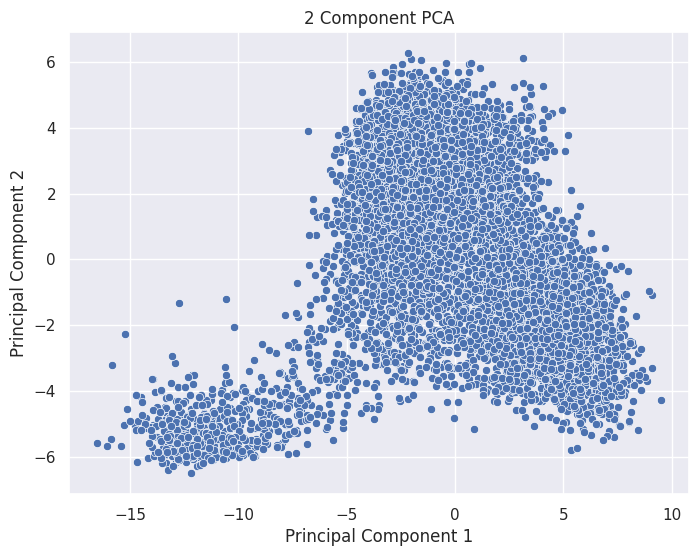

In [117]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

numerical_cols = train_df_smoothed.select_dtypes(include=np.number).columns.tolist()

features = train_df_smoothed[numerical_cols]

features = features.fillna(features.mean())


scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply PCA
# You can choose the number of components, e.g., n_components=2 for visualization,
# or n_components=0.95 to retain 95% of the variance.
pca = PCA(n_components=2)

principal_components = pca.fit_transform(features_scaled)

# Create a new DataFrame with the principal components
pca_df = pd.DataFrame(data = principal_components,
                      columns = ['principal_component_1', 'principal_component_2'])

print("PCA applied. Resulting DataFrame with principal components:")
print(pca_df.head())

# Explained variance ratio
print("\nExplained variance ratio by each principal component:")
print(pca.explained_variance_ratio_)
print("\nTotal explained variance:", pca.explained_variance_ratio_.sum())

# You can visualize the principal components if you reduced to 2 or 3 dimensions
if pca.n_components_ == 2:
  plt.figure(figsize=(8,6))
  sns.scatterplot(x='principal_component_1', y='principal_component_2', data=pca_df)
  plt.title('2 Component PCA')
  plt.xlabel('Principal Component 1')
  plt.ylabel('Principal Component 2')
  plt.show()


In [118]:
train_df_smoothed

,Unnamed: 0,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,...,20140218_N_smoothed,20140202_N_smoothed,20140117_N_smoothed,20140101_N_smoothed,ndvi_mean_s,ndvi_std_s,ndvi_min_s,ndvi_max_s,ndvi_range_s,ndvi_median_s
0,0,1,water,637.5950,658.668000,-1882.030000,-1924.360000,997.904000,-1739.990000,630.087000,...,211.328000,-2203.020,-1180.190000,433.906,-83.199985,1168.290047,-2203.020000,2013.680657,4216.700657,433.906000
1,1,2,water,634.2400,593.705000,-1625.790000,-1672.320000,914.198000,-692.386000,707.626000,...,220.878000,-2250.000,-1360.560000,524.075,-168.687157,1031.967974,-2250.000000,2013.680657,4263.680657,214.200000
2,3,4,water,58.0174,-1599.160000,1101.121938,-1052.630000,1037.900596,-1564.630000,1131.306331,...,369.214000,-2202.120,973.156134,-1343.550,11.609854,1294.020013,-3162.140000,2505.037316,5667.177316,369.214000
3,4,5,water,72.5180,1628.972375,380.436000,-1256.930000,515.805000,-1413.180000,-802.942000,...,298.320000,-2197.360,973.156134,-826.727,-116.589388,1113.909115,-2829.400000,1628.972375,4458.372375,298.320000
4,7,8,water,1136.4400,1628.972375,1101.121938,1647.830000,1935.800000,931.040746,2158.980000,...,1660.650000,-116.801,-568.050000,-1357.140,747.709522,1230.552225,-2646.050000,2505.037316,5151.087316,1101.121938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,10537,10538,impervious,1207.7000,984.620000,1703.133611,1166.250000,937.478000,1072.700000,823.896000,...,362.882000,979.795,1685.555382,433.659,1059.310961,440.817977,362.882000,2248.894448,1886.012448,1044.110000
7996,10538,10539,impervious,2170.3500,1419.720000,1361.000000,1478.710000,983.911000,1262.110000,1422.860000,...,446.724000,771.747,1589.060000,506.936,1256.870979,548.536802,336.289000,2178.670000,1842.381000,1372.680000
7997,10541,10542,impervious,1895.6800,1454.740000,1703.133611,1033.560000,1930.380000,1057.150000,1471.600000,...,1095.000000,1818.650,2501.720000,1247.770,1591.713436,607.530734,447.868000,2780.930000,2333.062000,1471.600000
7998,10542,10543,impervious,3465.7400,1283.320000,413.412000,4391.050000,1146.820000,4473.050000,1614.750000,...,876.051986,3759.710,1685.555382,388.346,2219.456429,1613.433712,244.594000,5833.760000,5589.166000,1685.555382


In [119]:
train_df_smoothed.columns

Index(['Unnamed: 0', 'ID', 'class', '20150720_N', '20150602_N', '20150517_N',
       '20150501_N', '20150415_N', '20150330_N', '20150314_N', '20150226_N',
       '20150210_N', '20150125_N', '20150109_N', '20141117_N', '20141101_N',
       '20141016_N', '20140930_N', '20140813_N', '20140626_N', '20140610_N',
       '20140525_N', '20140509_N', '20140423_N', '20140407_N', '20140322_N',
       '20140218_N', '20140202_N', '20140117_N', '20140101_N', 'ndvi_mean',
       'ndvi_std', 'ndvi_min', 'ndvi_max', 'ndvi_range', 'ndvi_median',
       '20150720_N_smoothed', '20150602_N_smoothed', '20150517_N_smoothed',
       '20150501_N_smoothed', '20150415_N_smoothed', '20150330_N_smoothed',
       '20150314_N_smoothed', '20150226_N_smoothed', '20150210_N_smoothed',
       '20150125_N_smoothed', '20150109_N_smoothed', '20141117_N_smoothed',
       '20141101_N_smoothed', '20141016_N_smoothed', '20140930_N_smoothed',
       '20140813_N_smoothed', '20140626_N_smoothed', '20140610_N_smoothed',
       '20

In [120]:
train_df_smoothed.drop(columns=['Unnamed: 0','ID'], inplace=True)

In [121]:
train_df_smoothed.columns

Index(['class', '20150720_N', '20150602_N', '20150517_N', '20150501_N',
       '20150415_N', '20150330_N', '20150314_N', '20150226_N', '20150210_N',
       '20150125_N', '20150109_N', '20141117_N', '20141101_N', '20141016_N',
       '20140930_N', '20140813_N', '20140626_N', '20140610_N', '20140525_N',
       '20140509_N', '20140423_N', '20140407_N', '20140322_N', '20140218_N',
       '20140202_N', '20140117_N', '20140101_N', 'ndvi_mean', 'ndvi_std',
       'ndvi_min', 'ndvi_max', 'ndvi_range', 'ndvi_median',
       '20150720_N_smoothed', '20150602_N_smoothed', '20150517_N_smoothed',
       '20150501_N_smoothed', '20150415_N_smoothed', '20150330_N_smoothed',
       '20150314_N_smoothed', '20150226_N_smoothed', '20150210_N_smoothed',
       '20150125_N_smoothed', '20150109_N_smoothed', '20141117_N_smoothed',
       '20141101_N_smoothed', '20141016_N_smoothed', '20140930_N_smoothed',
       '20140813_N_smoothed', '20140626_N_smoothed', '20140610_N_smoothed',
       '20140525_N_smoothed', 

In [122]:
X = train_df_smoothed.drop(columns=['class'])
y = train_df_smoothed['class']

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [124]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [125]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [127]:
model = LogisticRegression()
model.fit(X_train_res, y_train_res)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.85875
Classification Report:
               precision    recall  f1-score   support

        farm       0.62      0.79      0.69       161
      forest       0.99      0.88      0.93      1231
       grass       0.39      0.91      0.55        43
  impervious       0.91      0.77      0.83       141
     orchard       0.10      0.50      0.17         6
       water       0.34      1.00      0.51        18

    accuracy                           0.86      1600
   macro avg       0.56      0.81      0.61      1600
weighted avg       0.92      0.86      0.88      1600



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [128]:
test_df

,Unnamed: 0,ID,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,1,7466.4200,413.162,5761.000,5625.45,489.4030,3923.84,3097.110,6766.42000,...,801.184,927.115,4704.14,6378.42,340.949,2695.5700,527.268,4736.75,601.843,6639.760
1,1,2,7235.2600,6037.350,1027.560,6085.14,1618.0500,6668.54,2513.990,1051.69000,...,5533.470,5103.040,5216.12,4885.27,4366.790,1234.1400,3298.110,6942.68,1070.440,842.101
2,2,3,7425.0800,6969.980,1177.940,7408.93,861.0610,7644.43,814.458,1504.29000,...,1981.390,6204.540,7021.69,5704.41,4897.450,1789.9900,2206.100,6928.93,1036.560,831.441
3,3,4,7119.1200,1731.620,6311.930,6441.61,465.9790,7128.42,1649.120,6935.22000,...,959.344,5794.150,1045.57,5572.90,586.287,685.9060,1287.000,6734.72,824.584,6883.610
4,4,5,7519.5500,8130.260,1482.540,7879.53,1001.2100,7937.60,4122.530,1094.51000,...,7636.070,6996.760,7413.43,4596.13,4511.700,1413.5200,3283.940,7937.68,1857.800,1336.920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2840,2840,2841,-1673.7400,-2514.480,-2451.190,-2738.44,64.4464,-2275.03,-2881.100,-4738.97000,...,-2257.890,-2582.420,-1699.10,-2295.30,306.483,209.4030,221.920,-4885.15,-2630.590,356.233
2841,2841,2842,-96.8233,-412.727,-1795.400,-2363.82,-2168.1900,-2162.68,-3155.740,-4416.11000,...,-3991.910,-2614.910,-2109.84,-2687.18,-2853.890,71.3402,-86.414,-5109.01,324.637,-4316.580
2842,2842,2843,-2364.6000,-155.592,-1422.090,-1713.40,465.6220,-2230.40,-3088.730,-5010.32000,...,-2484.500,-1756.080,-3820.43,-1988.23,433.852,291.8000,254.548,-4259.30,412.115,-1170.750
2843,2843,2844,-3004.6300,-1217.120,180.122,-1113.89,438.4180,-2442.51,-3210.560,-3237.74000,...,-3291.490,-2018.450,-3472.65,-3109.07,511.792,369.0970,276.948,-5574.51,298.739,460.419


In [129]:
test_df.drop(columns=['Unnamed: 0'], inplace=True)

In [130]:
test_df

,ID,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,20150210_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,1,7466.4200,413.162,5761.000,5625.45,489.4030,3923.84,3097.110,6766.42000,2829.130,...,801.184,927.115,4704.14,6378.42,340.949,2695.5700,527.268,4736.75,601.843,6639.760
1,2,7235.2600,6037.350,1027.560,6085.14,1618.0500,6668.54,2513.990,1051.69000,7268.220,...,5533.470,5103.040,5216.12,4885.27,4366.790,1234.1400,3298.110,6942.68,1070.440,842.101
2,3,7425.0800,6969.980,1177.940,7408.93,861.0610,7644.43,814.458,1504.29000,7002.630,...,1981.390,6204.540,7021.69,5704.41,4897.450,1789.9900,2206.100,6928.93,1036.560,831.441
3,4,7119.1200,1731.620,6311.930,6441.61,465.9790,7128.42,1649.120,6935.22000,2176.800,...,959.344,5794.150,1045.57,5572.90,586.287,685.9060,1287.000,6734.72,824.584,6883.610
4,5,7519.5500,8130.260,1482.540,7879.53,1001.2100,7937.60,4122.530,1094.51000,7951.440,...,7636.070,6996.760,7413.43,4596.13,4511.700,1413.5200,3283.940,7937.68,1857.800,1336.920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2840,2841,-1673.7400,-2514.480,-2451.190,-2738.44,64.4464,-2275.03,-2881.100,-4738.97000,-4293.570,...,-2257.890,-2582.420,-1699.10,-2295.30,306.483,209.4030,221.920,-4885.15,-2630.590,356.233
2841,2842,-96.8233,-412.727,-1795.400,-2363.82,-2168.1900,-2162.68,-3155.740,-4416.11000,-5648.660,...,-3991.910,-2614.910,-2109.84,-2687.18,-2853.890,71.3402,-86.414,-5109.01,324.637,-4316.580
2842,2843,-2364.6000,-155.592,-1422.090,-1713.40,465.6220,-2230.40,-3088.730,-5010.32000,-4211.420,...,-2484.500,-1756.080,-3820.43,-1988.23,433.852,291.8000,254.548,-4259.30,412.115,-1170.750
2843,2844,-3004.6300,-1217.120,180.122,-1113.89,438.4180,-2442.51,-3210.560,-3237.74000,-192.857,...,-3291.490,-2018.450,-3472.65,-3109.07,511.792,369.0970,276.948,-5574.51,298.739,460.419


In [131]:
ndvi_cols = [col for col in test_df.columns if col.endswith('_N')]

test_df['ndvi_mean'] = test_df[ndvi_cols].mean(axis=1)
test_df['ndvi_std'] = test_df[ndvi_cols].std(axis=1)
test_df['ndvi_min'] = test_df[ndvi_cols].min(axis=1)
test_df['ndvi_max'] = test_df[ndvi_cols].max(axis=1)
test_df['ndvi_range'] = test_df['ndvi_max'] - test_df['ndvi_min']
test_df['ndvi_median'] = test_df[ndvi_cols].median(axis=1)


In [132]:
def smooth_n_columns_and_merge(df, frac=0.1):
    df_smoothed = df.copy()
    n_columns = [col for col in df.columns if col.endswith('_N')]

    for col in n_columns:
        non_null_data = df[col].dropna()
        if len(non_null_data) > 1:
            x_values = np.arange(len(non_null_data))
            y_values = non_null_data.values
            smoothed_data = lowess(y_values, x_values, frac=frac, return_sorted=False)
            smoothed_series = pd.Series(smoothed_data, index=non_null_data.index)
            df_smoothed[col + '_smoothed'] = smoothed_series
        else:
            df_smoothed[col + '_smoothed'] = df[col]

    df_merged = pd.merge(df, df_smoothed[[col + '_smoothed' for col in n_columns]], left_index=True, right_index=True, how='left')

    return df_merged

# Apply the function to test_df
test_df_smoothed = smooth_n_columns_and_merge(test_df.copy(), frac=0.1)

# View the result
print("Shape after adding smoothed columns:", test_df.shape)
test_df_smoothed.head()


Shape after adding smoothed columns: (2845, 34)


,ID,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,20150210_N,...,20140610_N_smoothed,20140525_N_smoothed,20140509_N_smoothed,20140423_N_smoothed,20140407_N_smoothed,20140322_N_smoothed,20140218_N_smoothed,20140202_N_smoothed,20140117_N_smoothed,20140101_N_smoothed
0,1,7466.42,413.162,5761.00,5625.45,489.403,3923.84,3097.110,6766.42,2829.13,...,2071.405271,2303.252509,1464.587841,2402.770737,1157.979116,1283.984356,657.368492,336.910550,817.591461,434.952724
1,2,7235.26,6037.350,1027.56,6085.14,1618.050,6668.54,2513.990,1051.69,7268.22,...,2078.930559,2305.991930,1469.872767,2395.656644,1159.006512,1282.995244,658.168915,364.600762,830.624610,445.369634
2,3,7425.08,6969.980,1177.94,7408.93,861.061,7644.43,814.458,1504.29,7002.63,...,2086.486302,2308.781701,1475.204546,2388.610421,1160.046617,1282.024035,658.981729,392.295407,843.676224,455.832503
3,4,7119.12,1731.620,6311.93,6441.61,465.979,7128.42,1649.120,6935.22,2176.80,...,2094.072687,2311.622156,1480.583341,2381.632422,1161.099478,1281.070826,659.807009,419.994381,856.746407,466.341519
4,5,7519.55,8130.260,1482.54,7879.53,1001.210,7937.60,4122.530,1094.51,7951.44,...,2101.689894,2314.513528,1486.009267,2374.722910,1162.165086,1280.135709,660.644798,447.697580,869.835257,476.896844


In [133]:
ndvi_cols = [col for col in test_df_smoothed.columns if col.endswith('_N')]

test_df_smoothed['ndvi_mean_s'] = test_df_smoothed[ndvi_cols].mean(axis=1)
test_df_smoothed['ndvi_std_s'] = test_df_smoothed[ndvi_cols].std(axis=1)
test_df_smoothed['ndvi_min_s'] = test_df_smoothed[ndvi_cols].min(axis=1)
test_df_smoothed['ndvi_max_s'] = test_df_smoothed[ndvi_cols].max(axis=1)
test_df_smoothed['ndvi_range_s'] = test_df_smoothed['ndvi_max_s'] - test_df_smoothed['ndvi_min_s']
test_df_smoothed['ndvi_median_s'] = test_df_smoothed[ndvi_cols].median(axis=1)


In [134]:
# prompt: drop ID column from test_df_smoothed

test_df_smoothed.drop(columns=['ID'], inplace=True)

In [135]:
test_df_smoothed

,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,20150210_N,20150125_N,...,20140218_N_smoothed,20140202_N_smoothed,20140117_N_smoothed,20140101_N_smoothed,ndvi_mean_s,ndvi_std_s,ndvi_min_s,ndvi_max_s,ndvi_range_s,ndvi_median_s
0,7466.4200,413.162,5761.000,5625.45,489.4030,3923.84,3097.110,6766.42000,2829.130,6742.570,...,657.368492,336.910550,817.591461,434.952724,3343.529778,2477.036970,340.949,7466.420,7125.471,3097.110
1,7235.2600,6037.350,1027.560,6085.14,1618.0500,6668.54,2513.990,1051.69000,7268.220,6908.180,...,658.168915,364.600762,830.624610,445.369634,3750.664704,2514.860621,535.296,7425.840,6890.544,3298.110
2,7425.0800,6969.980,1177.940,7408.93,861.0610,7644.43,814.458,1504.29000,7002.630,6086.560,...,658.981729,392.295407,843.676224,455.832503,3790.384667,2807.079716,522.798,7644.430,7121.632,2206.100
3,7119.1200,1731.620,6311.930,6441.61,465.9790,7128.42,1649.120,6935.22000,2176.800,690.408,...,659.807009,419.994381,856.746407,466.341519,3242.310704,2627.535640,465.979,7128.420,6662.441,1731.620
4,7519.5500,8130.260,1482.540,7879.53,1001.2100,7937.60,4122.530,1094.51000,7951.440,8001.350,...,660.644798,447.697580,869.835257,476.896844,4468.600704,2980.248232,550.508,8130.260,7579.752,4345.240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2840,-1673.7400,-2514.480,-2451.190,-2738.44,64.4464,-2275.03,-2881.100,-4738.97000,-4293.570,-4402.210,...,876.437873,7502.978525,2044.883018,3509.187061,-1997.699207,1786.044716,-5611.400,491.678,6103.078,-2257.890
2841,-96.8233,-412.727,-1795.400,-2363.82,-2168.1900,-2162.68,-3155.740,-4416.11000,-5648.660,-5193.280,...,875.516536,7511.294572,2047.587492,3512.226091,-2318.400781,1984.884216,-5648.660,556.093,6204.753,-2168.190
2842,-2364.6000,-155.592,-1422.090,-1713.40,465.6220,-2230.40,-3088.730,-5010.32000,-4211.420,-3354.430,...,874.578184,7519.610455,2050.274419,3515.201578,-1640.061593,1724.990648,-5010.320,987.461,5997.781,-1713.400
2843,-3004.6300,-1217.120,180.122,-1113.89,438.4180,-2442.51,-3210.560,-3237.74000,-192.857,-2857.540,...,873.622886,7527.926170,2052.943536,3518.113712,-1170.447741,1782.525273,-5574.510,973.953,6548.463,-317.092


In [136]:
test_df_smoothed.columns

Index(['20150720_N', '20150602_N', '20150517_N', '20150501_N', '20150415_N',
       '20150330_N', '20150314_N', '20150226_N', '20150210_N', '20150125_N',
       '20150109_N', '20141117_N', '20141101_N', '20141016_N', '20140930_N',
       '20140813_N', '20140626_N', '20140610_N', '20140525_N', '20140509_N',
       '20140423_N', '20140407_N', '20140322_N', '20140218_N', '20140202_N',
       '20140117_N', '20140101_N', 'ndvi_mean', 'ndvi_std', 'ndvi_min',
       'ndvi_max', 'ndvi_range', 'ndvi_median', '20150720_N_smoothed',
       '20150602_N_smoothed', '20150517_N_smoothed', '20150501_N_smoothed',
       '20150415_N_smoothed', '20150330_N_smoothed', '20150314_N_smoothed',
       '20150226_N_smoothed', '20150210_N_smoothed', '20150125_N_smoothed',
       '20150109_N_smoothed', '20141117_N_smoothed', '20141101_N_smoothed',
       '20141016_N_smoothed', '20140930_N_smoothed', '20140813_N_smoothed',
       '20140626_N_smoothed', '20140610_N_smoothed', '20140525_N_smoothed',
       '20140509

In [137]:
test_df_smoothed

,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,20150210_N,20150125_N,...,20140218_N_smoothed,20140202_N_smoothed,20140117_N_smoothed,20140101_N_smoothed,ndvi_mean_s,ndvi_std_s,ndvi_min_s,ndvi_max_s,ndvi_range_s,ndvi_median_s
0,7466.4200,413.162,5761.000,5625.45,489.4030,3923.84,3097.110,6766.42000,2829.130,6742.570,...,657.368492,336.910550,817.591461,434.952724,3343.529778,2477.036970,340.949,7466.420,7125.471,3097.110
1,7235.2600,6037.350,1027.560,6085.14,1618.0500,6668.54,2513.990,1051.69000,7268.220,6908.180,...,658.168915,364.600762,830.624610,445.369634,3750.664704,2514.860621,535.296,7425.840,6890.544,3298.110
2,7425.0800,6969.980,1177.940,7408.93,861.0610,7644.43,814.458,1504.29000,7002.630,6086.560,...,658.981729,392.295407,843.676224,455.832503,3790.384667,2807.079716,522.798,7644.430,7121.632,2206.100
3,7119.1200,1731.620,6311.930,6441.61,465.9790,7128.42,1649.120,6935.22000,2176.800,690.408,...,659.807009,419.994381,856.746407,466.341519,3242.310704,2627.535640,465.979,7128.420,6662.441,1731.620
4,7519.5500,8130.260,1482.540,7879.53,1001.2100,7937.60,4122.530,1094.51000,7951.440,8001.350,...,660.644798,447.697580,869.835257,476.896844,4468.600704,2980.248232,550.508,8130.260,7579.752,4345.240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2840,-1673.7400,-2514.480,-2451.190,-2738.44,64.4464,-2275.03,-2881.100,-4738.97000,-4293.570,-4402.210,...,876.437873,7502.978525,2044.883018,3509.187061,-1997.699207,1786.044716,-5611.400,491.678,6103.078,-2257.890
2841,-96.8233,-412.727,-1795.400,-2363.82,-2168.1900,-2162.68,-3155.740,-4416.11000,-5648.660,-5193.280,...,875.516536,7511.294572,2047.587492,3512.226091,-2318.400781,1984.884216,-5648.660,556.093,6204.753,-2168.190
2842,-2364.6000,-155.592,-1422.090,-1713.40,465.6220,-2230.40,-3088.730,-5010.32000,-4211.420,-3354.430,...,874.578184,7519.610455,2050.274419,3515.201578,-1640.061593,1724.990648,-5010.320,987.461,5997.781,-1713.400
2843,-3004.6300,-1217.120,180.122,-1113.89,438.4180,-2442.51,-3210.560,-3237.74000,-192.857,-2857.540,...,873.622886,7527.926170,2052.943536,3518.113712,-1170.447741,1782.525273,-5574.510,973.953,6548.463,-317.092


In [138]:
test_df_smoothed.columns

Index(['20150720_N', '20150602_N', '20150517_N', '20150501_N', '20150415_N',
       '20150330_N', '20150314_N', '20150226_N', '20150210_N', '20150125_N',
       '20150109_N', '20141117_N', '20141101_N', '20141016_N', '20140930_N',
       '20140813_N', '20140626_N', '20140610_N', '20140525_N', '20140509_N',
       '20140423_N', '20140407_N', '20140322_N', '20140218_N', '20140202_N',
       '20140117_N', '20140101_N', 'ndvi_mean', 'ndvi_std', 'ndvi_min',
       'ndvi_max', 'ndvi_range', 'ndvi_median', '20150720_N_smoothed',
       '20150602_N_smoothed', '20150517_N_smoothed', '20150501_N_smoothed',
       '20150415_N_smoothed', '20150330_N_smoothed', '20150314_N_smoothed',
       '20150226_N_smoothed', '20150210_N_smoothed', '20150125_N_smoothed',
       '20150109_N_smoothed', '20141117_N_smoothed', '20141101_N_smoothed',
       '20141016_N_smoothed', '20140930_N_smoothed', '20140813_N_smoothed',
       '20140626_N_smoothed', '20140610_N_smoothed', '20140525_N_smoothed',
       '20140509

In [139]:
# prompt: predict the class labels using the test_df_smoothed

# Align columns of test_df_smoothed with the columns used for training (X_train)
# This is important to ensure the model sees the same features in the same order.
test_df_aligned = test_df_smoothed[X_train.columns]

# Handle potential missing values in the test set that were filled with the mean of the training set
# Use the same mean values calculated from the training data
test_df_aligned = test_df_aligned.fillna(X_train.mean())


# Scale the test data using the scaler fitted on the training data
X_test_final = scaler.transform(test_df_smoothed)

# Predict the class labels for the test set
test_predictions = model.predict(X_test_final)

# You can now inspect the predictions
print("Predictions for the test set:")
test_predictions

Predictions for the test set:


array(['forest', 'forest', 'forest', ..., 'water', 'water', 'water'],
      dtype=object)

In [140]:
test_ids = test_df['ID']

results_df = pd.DataFrame({
    'ID': test_ids,
    'predicted_label': test_predictions
})

print("\nDataFrame with ID and Predicted Label:")
print(results_df.head())
print("\nShape of the results DataFrame:", results_df.shape)



DataFrame with ID and Predicted Label:
   ID predicted_label
0   1          forest
1   2          forest
2   3          forest
3   4          forest
4   5          forest

Shape of the results DataFrame: (2845, 2)


In [141]:
results_df

,ID,predicted_label
0,1,forest
1,2,forest
2,3,forest
3,4,forest
4,5,forest
...,...,...
2840,2841,water
2841,2842,water
2842,2843,water
2843,2844,water


In [143]:
results_df.to_csv("last_submission5.csv", index=False)